# Single Stock EDA

In [2]:
# Set-Up
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import statsmodels.api as sm

data = yf.download("NVDA", start="2022-01-01", end="2024-06-10", auto_adjust=True)

[*********************100%%**********************]  1 of 1 completed


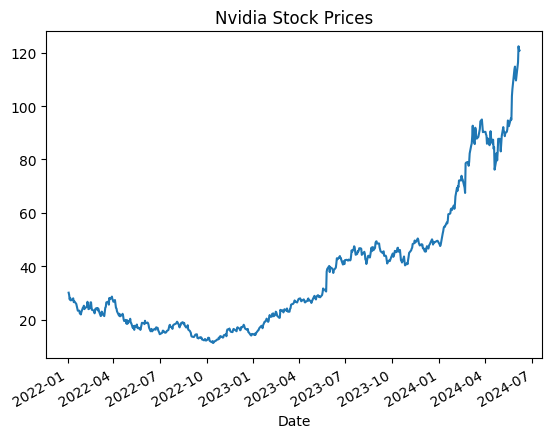

In [3]:
# Stock Information

nvda = yf.Ticker("NVDA")
# print(nvda.info)
dividends = nvda.dividends
splits = nvda.splits
# print(dividends, splits)

# Stock Price Graph

data['Close'].plot() # plt.plot(data['Close'])
plt.title("Nvidia Stock Prices")
plt.show()

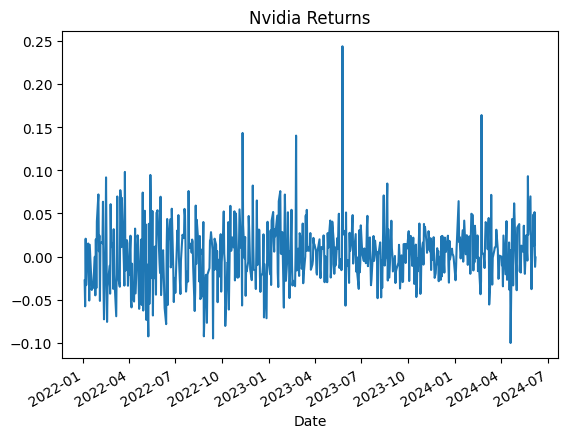

In [4]:
# Stock Return Graph

df = data[['Close']].copy()
df['Returns'] = df.Close.pct_change()
return_mean = np.mean(df['Returns'])
return_sd = np.std(df['Returns'])

df['Returns'].plot()
plt.title('Nvidia Returns')
plt.show()

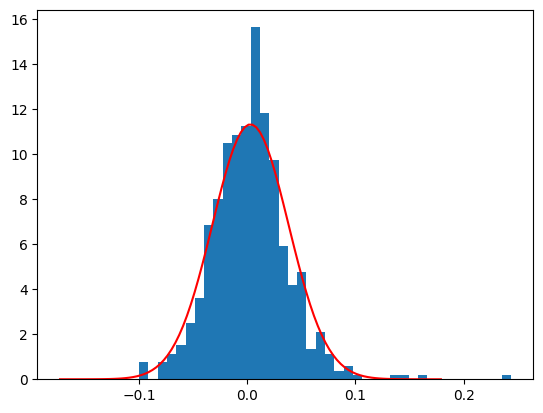

In [5]:
def normal_plot(df_column):
    mean_ = np.mean(df_column)
    sd_ = np.std(df_column)
    plt.hist(df['Returns'], bins=40, density=True)
    x = np.linspace(mean_ - 5*sd_, mean_ + 5*sd_, 100)
    plt.plot(x, scipy.stats.norm.pdf(x, mean_, sd_), "r")
    plt.show()

normal_plot(df['Returns'])